In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [2]:
import pandas as pd 
train = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')

test = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')
holidays = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
stores = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
transactions = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/transactions.csv')
oil = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')

print("Train data")
print(train.head())
print(train.info())

print('\nTest data')
print(test.head())
print(test.info())

print('\nHolidays data')
print(holidays.head())
print(holidays.info())

print('\nStore data')
print(stores.head())
print(stores.info())

print('\nTransactions data')
print(transactions.head())
print(transactions.info())

print('\nOil data')
print(oil.head())
print(oil.info())

Train data
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None

Test data
        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY 

In [3]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [4]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [5]:
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [6]:
oil['date'] = pd.to_datetime(oil['date']) 
oil = oil.sort_values(by='date') 
# Forward fill as an alternative to interpolation
oil['dcoilwtico'] = oil['dcoilwtico'].ffill()
oil['dcoilwtico'] = oil['dcoilwtico'].bfill()
oil.isna().sum()

date          0
dcoilwtico    0
dtype: int64

In [7]:
holidays.columns

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

In [8]:
holidays['date'] = pd.to_datetime(holidays['date'])
holidays = holidays.sort_values(by='date')



In [9]:
transactions.columns

Index(['date', 'store_nbr', 'transactions'], dtype='object')

In [10]:
transactions['date'] = pd.to_datetime(transactions['date'])
transactions = transactions.sort_values(by='date')

In [11]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


adding a date column in the train dataset

In [12]:
train = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')

In [13]:
test['date'] = pd.to_datetime(test['date'])
train['date'] = pd.to_datetime(train['date'])

 **Feature Engineering**

Creating date based features

In [14]:
train['day_of_week'] = train['date'].dt.dayofweek
train['month'] = train['date'].dt.month
train['quarter'] = train['date'].dt.quarter
train['year'] = train['date'].dt.year
train['is_weekend'] = train['date'].dt.dayofweek >=5
train.head()

,id,date,store_nbr,family,sales,onpromotion,day_of_week,month,quarter,year,is_weekend
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,1,1,2013,False
1,1,2013-01-01,1,BABY CARE,0.0,0,1,1,1,2013,False
2,2,2013-01-01,1,BEAUTY,0.0,0,1,1,1,2013,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,1,1,2013,False
4,4,2013-01-01,1,BOOKS,0.0,0,1,1,1,2013,False


In [15]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
day_of_week    0
month          0
quarter        0
year           0
is_weekend     0
dtype: int64

In [16]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
day_of_week    0
month          0
quarter        0
year           0
is_weekend     0
dtype: int64

In [17]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
day_of_week    0
month          0
quarter        0
year           0
is_weekend     0
dtype: int64

In [18]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
day_of_week    0
month          0
quarter        0
year           0
is_weekend     0
dtype: int64

In [19]:
train.describe()

,id,date,store_nbr,sales,onpromotion,day_of_week,month,quarter,year
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00,2.997031e+00,6.207838e+00,2.410333e+00,2.014838e+03
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.013000e+03
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.014000e+03
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00,3.000000e+00,6.000000e+00,2.000000e+00,2.015000e+03
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00,5.000000e+00,9.000000e+00,3.000000e+00,2.016000e+03
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02,6.000000e+00,1.200000e+01,4.000000e+00,2.017000e+03
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01,2.000740e+00,3.385668e+00,1.099952e+00,1.345518e+00


The date looks so unrealistic.
checking if id is aligned with date

In [20]:
unique_dates = train[['id','date']].drop_duplicates()
print(f"Unique IDs: {unique_dates['id'].nunique()},Unique Dates: {unique_dates['date'].nunique()}")

Unique IDs: 3000888,Unique Dates: 1684


In [21]:
print(f"Date range: {train['date'].min()} to {train['date'].max()}")

Date range: 2013-01-01 00:00:00 to 2017-08-15 00:00:00


In [22]:
start_date = '2012-01-01'
end_date = '2018-01-01'

train = train[(train['date'] >= start_date) & (train['date'] <= end_date)]

In [23]:
train.describe()

,id,date,store_nbr,sales,onpromotion,day_of_week,month,quarter,year
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00,2.997031e+00,6.207838e+00,2.410333e+00,2.014838e+03
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.013000e+03
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.014000e+03
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00,3.000000e+00,6.000000e+00,2.000000e+00,2.015000e+03
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00,5.000000e+00,9.000000e+00,3.000000e+00,2.016000e+03
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02,6.000000e+00,1.200000e+01,4.000000e+00,2.017000e+03
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01,2.000740e+00,3.385668e+00,1.099952e+00,1.345518e+00


setting date as the index for easier time-based analysis

In [24]:
train.set_index('date',inplace= True)
train.sort_index(inplace=True)

In [25]:
train['sales'].isna().sum()

0

Feature Engineering

In [26]:
train['sales_7d_avg'] = train['sales'].rolling(window=7,min_periods=1).mean()

In [27]:
train.isna().sum()

id              0
store_nbr       0
family          0
sales           0
onpromotion     0
day_of_week     0
month           0
quarter         0
year            0
is_weekend      0
sales_7d_avg    0
dtype: int64

In [28]:
train.isna().sum()

id              0
store_nbr       0
family          0
sales           0
onpromotion     0
day_of_week     0
month           0
quarter         0
year            0
is_weekend      0
sales_7d_avg    0
dtype: int64

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   store_nbr     int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   day_of_week   int32  
 6   month         int32  
 7   quarter       int32  
 8   year          int32  
 9   is_weekend    bool   
 10  sales_7d_avg  float64
dtypes: bool(1), float64(2), int32(4), int64(3), object(1)
memory usage: 208.9+ MB


In [30]:
train = pd.get_dummies(train,columns=['family'],drop_first=True)

In [31]:
numeric_data = train.select_dtypes(include=['float64','int64','int32'])

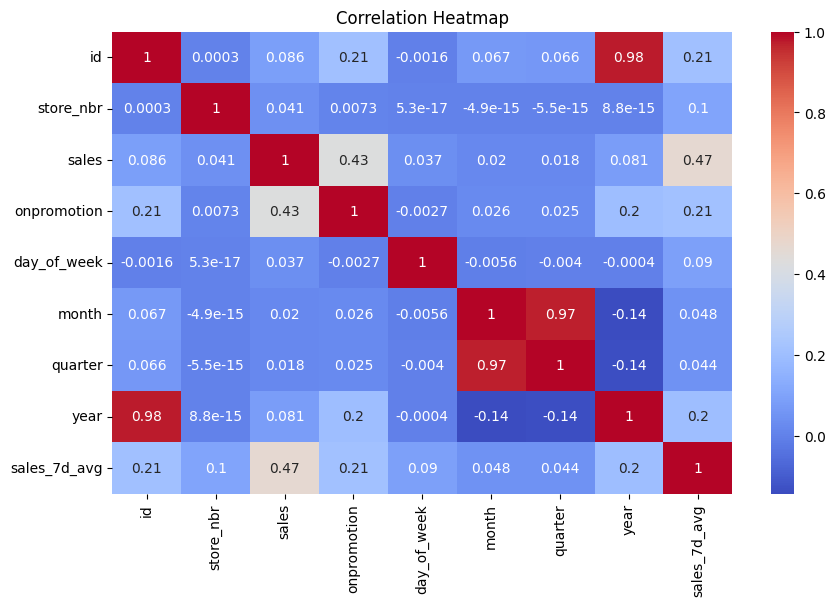

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Feature selection

In [33]:

train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 42 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   id                                 int64  
 1   store_nbr                          int64  
 2   sales                              float64
 3   onpromotion                        int64  
 4   day_of_week                        int32  
 5   month                              int32  
 6   quarter                            int32  
 7   year                               int32  
 8   is_weekend                         bool   
 9   sales_7d_avg                       float64
 10  family_BABY CARE                   bool   
 11  family_BEAUTY                      bool   
 12  family_BEVERAGES                   bool   
 13  family_BOOKS                       bool   
 14  family_BREAD/BAKERY                bool   
 15  family_CELEBRATION                 bool   
 16  fam

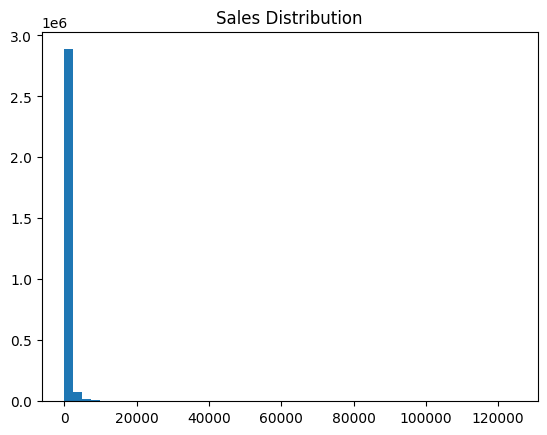

In [34]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(train['sales'], bins=50)
plt.title('Sales Distribution')
plt.show()

In [35]:
import numpy as np
train['log_sales'] = np.log1p(train['sales'])

In [36]:
train['is_zero_sales'] = train['sales'] == 0

In [37]:
correlation = train.corr()
print(correlation['sales'].sort_values(ascending=False))

sales                                1.000000
log_sales                            0.566665
family_GROCERY I                     0.548490
sales_7d_avg                         0.468110
onpromotion                          0.427923
family_BEVERAGES                     0.325324
family_PRODUCE                       0.159064
family_CLEANING                      0.114639
id                                   0.085784
year                                 0.081093
family_DAIRY                         0.056366
is_weekend                           0.051874
store_nbr                            0.041196
day_of_week                          0.036869
month                                0.019790
quarter                              0.018237
family_BREAD/BAKERY                  0.016933
family_POULTRY                      -0.001162
family_MEATS                        -0.002555
family_PERSONAL CARE                -0.014011
family_DELI                         -0.014861
family_HOME CARE                  

Retaining important features

In [38]:
important_features = ['sales','sales_7d_avg','onpromotion','family_GROCERY I',
'family_BEVERAGES','family_PRODUCE','is_zero_sales']

Including temporal features

In [39]:
important_features += ['day_of_week','month','year','quarter']

One-hot encoding remaining family categories

In [40]:
refined_train = train[important_features]

In [41]:
categorical_families = [col for col in train.columns if 'family' in col and col not in important_features]
refined_train = pd.concat([refined_train, train[categorical_families]], axis =1)

In [42]:
correlation = refined_train.corr()
print(correlation['sales'].sort_values(ascending=False))

sales                                1.000000
family_GROCERY I                     0.548490
sales_7d_avg                         0.468110
onpromotion                          0.427923
family_BEVERAGES                     0.325324
family_PRODUCE                       0.159064
family_CLEANING                      0.114639
year                                 0.081093
family_DAIRY                         0.056366
day_of_week                          0.036869
month                                0.019790
quarter                              0.018237
family_BREAD/BAKERY                  0.016933
family_POULTRY                      -0.001162
family_MEATS                        -0.002555
family_PERSONAL CARE                -0.014011
family_DELI                         -0.014861
family_HOME CARE                    -0.029128
family_EGGS                         -0.029894
family_FROZEN FOODS                 -0.032566
family_PREPARED FOODS               -0.041869
family_LIQUOR,WINE,BEER           

In [43]:
correlation_threshold = 0.1
low_corr = [col for col in train.columns if col != 'sales' and abs(train[col].corr(train['sales'])) < correlation_threshold]
print('Features with low correlation')
print(low_corr)

Features with low correlation
['id', 'store_nbr', 'day_of_week', 'month', 'quarter', 'year', 'is_weekend', 'family_BABY CARE', 'family_BEAUTY', 'family_BOOKS', 'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II', 'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS', 'family_POULTRY', 'family_PREPARED FOODS', 'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD']


In [44]:
refined_train = train.drop(columns= low_corr)
print("remaining features")
refined_train.columns

remaining features


Index(['sales', 'onpromotion', 'sales_7d_avg', 'family_BEVERAGES',
       'family_CLEANING', 'family_GROCERY I', 'family_PRODUCE', 'log_sales',
       'is_zero_sales'],
      dtype='object')

In [45]:
refined_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   sales             float64
 1   onpromotion       int64  
 2   sales_7d_avg      float64
 3   family_BEVERAGES  bool   
 4   family_CLEANING   bool   
 5   family_GROCERY I  bool   
 6   family_PRODUCE    bool   
 7   log_sales         float64
 8   is_zero_sales     bool   
dtypes: bool(5), float64(3), int64(1)
memory usage: 128.8 MB


In [46]:
refined_train.isnull().sum()

sales               0
onpromotion         0
sales_7d_avg        0
family_BEVERAGES    0
family_CLEANING     0
family_GROCERY I    0
family_PRODUCE      0
log_sales           0
is_zero_sales       0
dtype: int64

Splitting and training the model

In [47]:
from sklearn.model_selection import train_test_split

X= refined_train.drop(columns=['sales'])
y = refined_train['sales']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("Training set size:",X_train.shape)
print("Testing set size:",X_test.shape)

Training set size: (2400710, 8)
Testing set size: (600178, 8)
